In [24]:
import os, pickle, hashlib, akshare as ak, pandas as pd, time,numpy as np
import pyfolio as pf




C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
def cached_index_hist(symbol, start, end):
    _CACHE_DIR = "./ak_cache"
    os.makedirs(_CACHE_DIR, exist_ok=True)
    key = f"{symbol}_{start}_{end}"
    h = hashlib.md5(key.encode()).hexdigest()
    cache_file = os.path.join(_CACHE_DIR, f"{h}.pkl")
    if os.path.exists(cache_file):
        return pd.read_pickle(cache_file)

    df = ak.index_zh_a_hist(symbol=symbol,
                            period="daily",
                            start_date=start,
                            end_date=end)
    # 避免并发写
    pd.to_pickle(df, cache_file + ".tmp")
    os.replace(cache_file + ".tmp", cache_file)
    time.sleep(0.3)          # 降频
    return df

In [21]:
df = cached_index_hist("000300", "20060101", "20250829")
df['日期'] = pd.to_datetime(df['日期'])
df = df.set_index('日期')
df

,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
日期,,,,,,,,,,
2006-01-04,926.56,941.43,941.43,926.41,21126899,1.144261e+10,1.63,1.95,17.98,0.06
2006-01-05,943.85,959.13,959.62,942.31,27311743,1.469349e+10,1.84,1.88,17.70,0.08
2006-01-06,961.91,970.03,975.63,956.04,30286368,1.617099e+10,2.04,1.14,10.90,0.09
2006-01-09,971.09,975.25,976.27,966.05,24329552,1.262640e+10,1.05,0.54,5.22,0.07
2006-01-10,975.28,978.15,978.28,964.43,22735302,1.234402e+10,1.42,0.30,2.90,0.07
...,...,...,...,...,...,...,...,...,...,...
2025-08-25,4416.29,4469.22,4472.65,4404.78,358090006,8.236820e+11,1.55,2.08,91.22,1.09
2025-08-26,4453.35,4452.59,4476.80,4435.53,270621395,6.279505e+11,0.92,-0.37,-16.63,0.82
2025-08-27,4458.84,4386.13,4494.91,4386.13,333133898,7.850985e+11,2.44,-1.49,-66.46,1.01


In [22]:
df['sim_5pct_annual'] = df['收盘'].iloc[0] * (1.05 ** (np.arange(len(df)) / 252))
df['sim_6pct_annual'] = df['收盘'].iloc[0] * (1.06 ** (np.arange(len(df)) / 252))
df['sim_7pct_annual'] = df['收盘'].iloc[0] * (1.07 ** (np.arange(len(df)) / 252))
df['sim_8pct_annual'] = df['收盘'].iloc[0] * (1.08 ** (np.arange(len(df)) / 252))
df['sim_9pct_annual'] = df['收盘'].iloc[0] * (1.09 ** (np.arange(len(df)) / 252))
df['sim_10pct_annual'] = df['收盘'].iloc[0] * (1.10 ** (np.arange(len(df)) / 252))


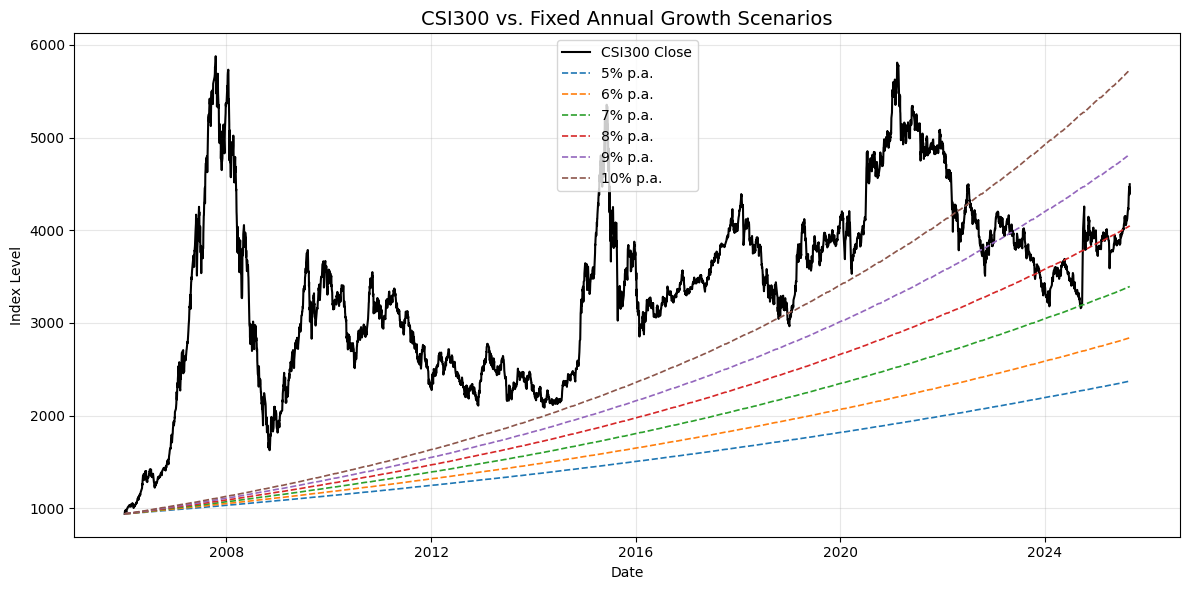

In [23]:
import matplotlib.pyplot as plt

# 1. 定义要画的列和对应年化收益率
cols_map = {
    '收盘':              ('black', '-',   'CSI300 Close'),
    'sim_5pct_annual':   ('tab:blue',    '--', '5% p.a.'),
    'sim_6pct_annual':   ('tab:orange',  '--', '6% p.a.'),
    'sim_7pct_annual':   ('tab:green',   '--', '7% p.a.'),
    'sim_8pct_annual':   ('tab:red',     '--', '8% p.a.'),
    'sim_9pct_annual':   ('tab:purple',  '--', '9% p.a.'),
    'sim_10pct_annual':  ('tab:brown',   '--', '10% p.a.'),
}

# 2. 画图
plt.figure(figsize=(12, 6))

for col, (color, ls, label) in cols_map.items():
    plt.plot(df.index, df[col],
             color=color,
             linestyle=ls,
             linewidth=1.5 if col == '收盘' else 1.2,
             label=label)

# 3. 美化
plt.title('CSI300 vs. Fixed Annual Growth Scenarios', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Index Level')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

沪深300按3年区间滚动统计的大级别上升波段：
      period  rally_id start_date   end_date  duration_days  total_return  \
0  2006-2009       2.0 2006-02-14 2007-06-01            316        2.6628   
1  2012-2015    1356.0 2014-10-15 2015-06-25            172        0.9102   
2  2006-2009       6.0 2007-07-06 2007-11-09             86        0.3585   
3  2018-2020    2294.0 2020-04-07 2021-03-23            234        0.3189   

   max_potential_return  
0                3.0136  
1                1.1729  
2                0.5840  
3                0.5291  

各3年区间的波段特征统计：
           rally_count  duration_days  total_return  max_potential_return
period                                                                   
2006-2009            2          201.0        1.5107                1.7988
2012-2015            1          172.0        0.9102                1.1729
2018-2020            1          234.0        0.3189                0.5291

注：total_return和max_potential_return为涨幅比例，如0.25表示25%


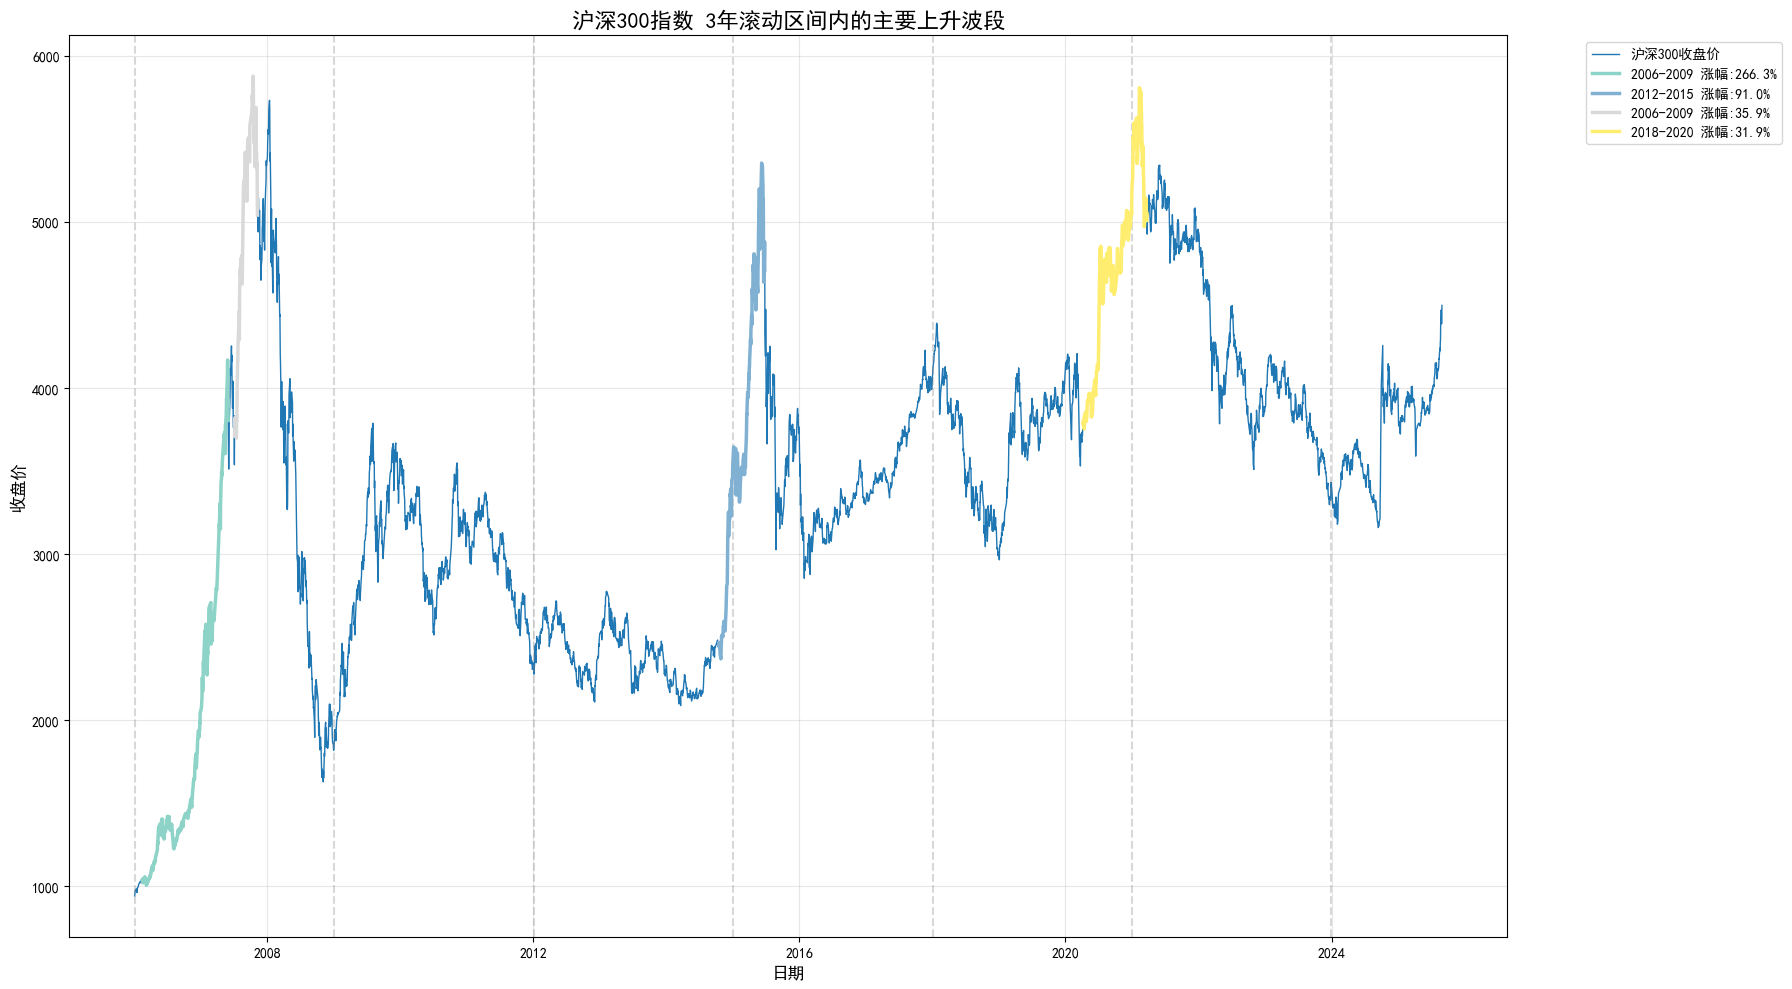

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 假设你的原始数据框名为df，这里进行数据准备
hs300_df = df.copy()  # 复制原始数据避免修改
hs300_df['date'] = hs300_df.index  # 假设索引是日期
hs300_df['close'] = hs300_df['收盘']  # 提取收盘价

# 数据预处理
hs300_df['date'] = pd.to_datetime(hs300_df['date'])  # 确保日期格式正确
hs300_df = hs300_df.sort_values('date').reset_index(drop=True)  # 按日期排序
hs300_df = hs300_df.dropna(subset=['close'])  # 删除收盘价缺失值
hs300_df['daily_return'] = hs300_df['close'].pct_change()  # 计算日涨跌幅

# --------------------------
# 核心参数设置
# --------------------------
window_years = 3  # 滚动窗口大小（3年）
drawdown_threshold = 0.15    # 下跌阈值：从区间高点回撤≥5%，视为上升结束
rally_threshold = 0.10       # 上涨阈值：从区间低点反弹≥3%，视为上升开始
min_rally_return = 0.20      # 最小上升幅度：≥20%才统计
min_rally_days = 30          # 最小持续时间：≥30个交易日才统计

# 计算3年内的交易日数量（约252个交易日/年）
window_days = window_years * 252

# --------------------------
# 计算滚动窗口内的高低点（核心修改部分）
# --------------------------
# 1. 计算过去3年内的最高价（滚动窗口）
hs300_df['rolling_high'] = hs300_df['close'].rolling(window=window_days, min_periods=1).max()

# 2. 计算过去3年内的最低价（滚动窗口）
hs300_df['rolling_low'] = hs300_df['close'].rolling(window=window_days, min_periods=1).min()

# 3. 计算从滚动高点的回撤幅度和从滚动低点的反弹幅度
hs300_df['drawdown_from_rolling_high'] = (hs300_df['close'] - hs300_df['rolling_high']) / hs300_df['rolling_high']
hs300_df['rally_from_rolling_low'] = (hs300_df['close'] - hs300_df['rolling_low']) / hs300_df['rolling_low']

# --------------------------
# 标记3年滚动窗口内的上升阶段
# --------------------------
hs300_df['is_rally'] = 0  # 初始化：默认非上升
rally_start_idx = None     # 记录上升波段的起始索引

for i in range(1, len(hs300_df)):
    # 情况1：未在上升阶段，且满足“反弹阈值”→ 标记上升开始
    if rally_start_idx is None and hs300_df.loc[i, 'rally_from_rolling_low'] >= rally_threshold:
        rally_start_idx = i
        hs300_df.loc[i, 'is_rally'] = 1
    
    # 情况2：已在上升阶段，且未满足“回撤阈值”→ 继续标记上升
    elif rally_start_idx is not None and hs300_df.loc[i, 'drawdown_from_rolling_high'] > -drawdown_threshold:
        hs300_df.loc[i, 'is_rally'] = 1
    
    # 情况3：已在上升阶段，但满足“回撤阈值”→ 标记上升结束
    elif rally_start_idx is not None and hs300_df.loc[i, 'drawdown_from_rolling_high'] <= -drawdown_threshold:
        hs300_df.loc[i, 'is_rally'] = 0
        rally_start_idx = None  # 重置，等待下一个上升开始

# --------------------------
# 识别并统计上升波段
# --------------------------
# 给连续的上升阶段分配“波段ID”
hs300_df['rally_id'] = (hs300_df['is_rally'] != hs300_df['is_rally'].shift(1)).cumsum()
hs300_df.loc[hs300_df['is_rally'] == 0, 'rally_id'] = np.nan  # 非上升阶段ID设为NaN

# 按波段ID分组，计算每个波段的核心指标
rally_stats = hs300_df.groupby('rally_id').agg({
    'date': ['min', 'max'],          # 波段的起始日期、结束日期
    'close': ['first', 'last', 'min', 'max'],  # 起始价、结束价、波段内最低价、最高价
    'is_rally': 'count'             # 波段持续的交易日数
}).reset_index()

# 简化列名
rally_stats.columns = [
    'rally_id', 'start_date', 'end_date', 
    'start_close', 'end_close', 'low_close', 'high_close', 
    'duration_days'
]

# 计算上升幅度
rally_stats['total_return'] = (rally_stats['end_close'] - rally_stats['start_close']) / rally_stats['start_close']
rally_stats['max_potential_return'] = (rally_stats['high_close'] - rally_stats['start_close']) / rally_stats['start_close']

# 筛选符合条件的大级别波段
large_rallies = rally_stats[
    (rally_stats['total_return'] >= min_rally_return) &  # 涨幅≥20%
    (rally_stats['duration_days'] >= min_rally_days)     # 持续≥30天
].sort_values('total_return', ascending=False).reset_index(drop=True)

# --------------------------
# 按3年区间分组统计
# --------------------------
# 创建3年区间标签
start_date = hs300_df['date'].min()
end_date = hs300_df['date'].max()

# 生成所有3年区间的起始和结束日期
periods = []
current_start = start_date
while current_start < end_date:
    current_end = current_start + timedelta(days=3*365)
    if current_end > end_date:
        current_end = end_date
    periods.append((current_start, current_end))
    current_start = current_end  # 非重叠窗口，若要重叠可改为current_start += timedelta(days=1*365)

# 为每个波段分配所属的3年区间
large_rallies['period'] = ''
for i, (period_start, period_end) in enumerate(periods):
    mask = (large_rallies['start_date'] >= period_start) & (large_rallies['start_date'] < period_end)
    period_label = f"{period_start.strftime('%Y')}-{period_end.strftime('%Y')}"
    large_rallies.loc[mask, 'period'] = period_label

# 按3年区间统计波段数量和平均表现
period_stats = large_rallies.groupby('period').agg({
    'rally_id': 'count',  # 波段数量
    'duration_days': 'mean',  # 平均持续天数
    'total_return': 'mean',  # 平均实际涨幅
    'max_potential_return': 'mean'  # 平均最大潜在涨幅
}).rename(columns={'rally_id': 'rally_count'}).round(4)

# --------------------------
# 结果输出
# --------------------------
print("沪深300按3年区间滚动统计的大级别上升波段：")
print("="*100)
print(large_rallies[['period', 'rally_id', 'start_date', 'end_date', 'duration_days', 
                     'total_return', 'max_potential_return']].round(4))

print("\n各3年区间的波段特征统计：")
print("="*100)
print(period_stats)
print("\n注：total_return和max_potential_return为涨幅比例，如0.25表示25%")

# --------------------------
# 可视化结果
# --------------------------
plt.figure(figsize=(18, 10))

# 绘制沪深300收盘价
plt.plot(hs300_df['date'], hs300_df['close'], color='#1f77b4', linewidth=1, label='沪深300收盘价')

# 标记3年区间分隔线
for _, (period_start, period_end) in enumerate(periods):
    plt.axvline(x=period_start, color='gray', linestyle='--', alpha=0.3)

# 标记主要上升波段
top_rallies = large_rallies.sort_values('total_return', ascending=False).head(5)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_rallies)))

for i, (_, rally) in enumerate(top_rallies.iterrows()):
    mask = (hs300_df['date'] >= rally['start_date']) & (hs300_df['date'] <= rally['end_date'])
    plt.plot(hs300_df.loc[mask, 'date'], hs300_df.loc[mask, 'close'], 
             color=colors[i], linewidth=2.5, label=f"{rally['period']} 涨幅:{rally['total_return']:.1%}")

plt.title(f'沪深300指数 {window_years}年滚动区间内的主要上升波段', fontsize=16)
plt.xlabel('日期', fontsize=12)
plt.ylabel('收盘价', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


沪深300每年最大回撤：
    year  annual_max_drawdown  max_drawdown_abs
0   2006              -0.1382            0.1382
1   2007              -0.2090            0.2090
2   2008              -0.7160            0.7160
3   2009              -0.2526            0.2526
4   2010              -0.2950            0.2950
5   2011              -0.3164            0.3164
6   2012              -0.2241            0.2241
7   2013              -0.2216            0.2216
8   2014              -0.1012            0.1012
9   2015              -0.4348            0.4348
10  2016              -0.1938            0.1938
11  2017              -0.0607            0.0607
12  2018              -0.3188            0.3188
13  2019              -0.1349            0.1349
14  2020              -0.1608            0.1608
15  2021              -0.1819            0.1819
16  2022              -0.2865            0.2865
17  2023              -0.2151            0.2151
18  2024              -0.1441            0.1441
19  2025              -0.10

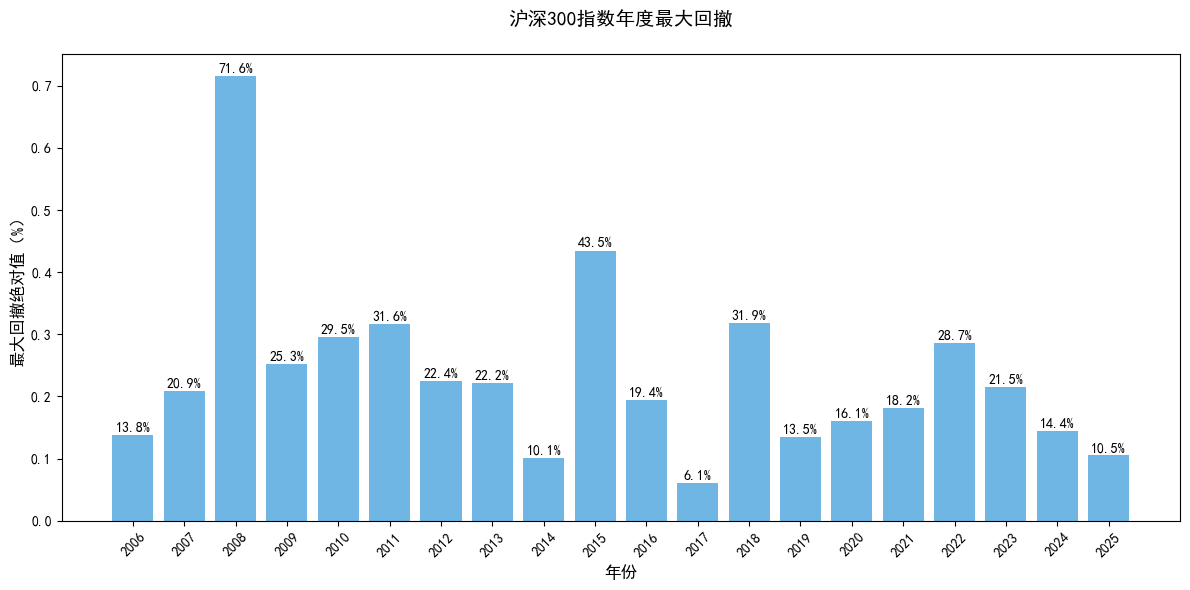

In [71]:
import pandas as pd

# 1. 转换日期列为datetime格式（若未转换）
hs300_df['date'] = pd.to_datetime(hs300_df['date'])

# 2. 按日期升序排列（确保时间顺序正确）
hs300_df = hs300_df.sort_values('date').reset_index(drop=True)

# 3. 添加“年份”列（用于分组，格式为YYYY，如2023）
hs300_df['year'] = hs300_df['date'].dt.year

def calculate_max_drawdown(close_series):
    """
    计算单组收盘价的最大回撤
    参数：close_series - 某一年的收盘价序列（pandas.Series，按日期升序）
    返回：该年的最大回撤（float，负数）
    """
    # 1. 计算该年的“累计最高点”（到每个日期为止的历史最高价）
    rolling_high = close_series.cummax()  # 每日的前期最高点
    
    # 2. 计算每日的回撤（当日收盘价相对于前期最高点的跌幅）
    daily_drawdown = (close_series - rolling_high) / rolling_high
    
    # 3. 该年的最大回撤 = 每日回撤的最小值（跌幅最大的那个值）
    max_drawdown = daily_drawdown.min()
    
    return max_drawdown

def calculate_annual_return(daily_return_series):
    """
    通过每日收益率累积计算年度收益（复利方式）
    参数：daily_return_series - 某一年的每日收益率序列（pandas.Series）
    返回：年度累计收益（float）
    """
    # 过滤NaN值（首行无每日收益，因无前一日数据）
    valid_returns = daily_return_series.dropna()
    
    # 复利计算：(1+每日收益1) * (1+每日收益2) * ... - 1
    # 若全年无有效收益数据（极端情况），返回0
    if len(valid_returns) == 0:
        return 0.0
    
    cumulative_return = (1 + valid_returns).prod() - 1
    return cumulative_return

# 按年份分组，计算每组的最大回撤
annual_max_drawdown = hs300_df.groupby('year')['close'].apply(calculate_max_drawdown)

# 转换为DataFrame格式，便于查看（可选，增加可读性）
annual_max_drawdown = annual_max_drawdown.reset_index()
annual_max_drawdown.columns = ['year', 'annual_max_drawdown']  # 重命名列

# （可选）添加“最大回撤绝对值”列，更直观
annual_max_drawdown['max_drawdown_abs'] = annual_max_drawdown['annual_max_drawdown'].abs()

# 1. 打印年度最大回撤（保留4位小数，按年份升序）
print("沪深300每年最大回撤：")
print(annual_max_drawdown.round(4))

# 2. 可视化（用柱状图展示每年的最大回撤绝对值）
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示问题
plt.figure(figsize=(12, 6))

# 柱状图：x=年份，y=最大回撤绝对值
plt.bar(
    annual_max_drawdown['year'], 
    annual_max_drawdown['max_drawdown_abs'],
    color='#3498db', alpha=0.7
)

# 添加标题和标签
plt.title('沪深300指数年度最大回撤', fontsize=14, pad=20)
plt.xlabel('年份', fontsize=12)
plt.ylabel('最大回撤绝对值（%）', fontsize=12)
plt.xticks(annual_max_drawdown['year'], rotation=45)  # 年份标签旋转，避免重叠

# 在柱子上添加数值标签（显示百分比，保留1位小数）
for i, val in enumerate(annual_max_drawdown['max_drawdown_abs']):
    plt.text(
        annual_max_drawdown['year'].iloc[i], 
        val + 0.005,  # 数值标签在柱子上方，避免重叠
        f'{val*100:.1f}%', 
        ha='center', fontsize=10
    )

plt.tight_layout()  # 自动调整布局
plt.show()

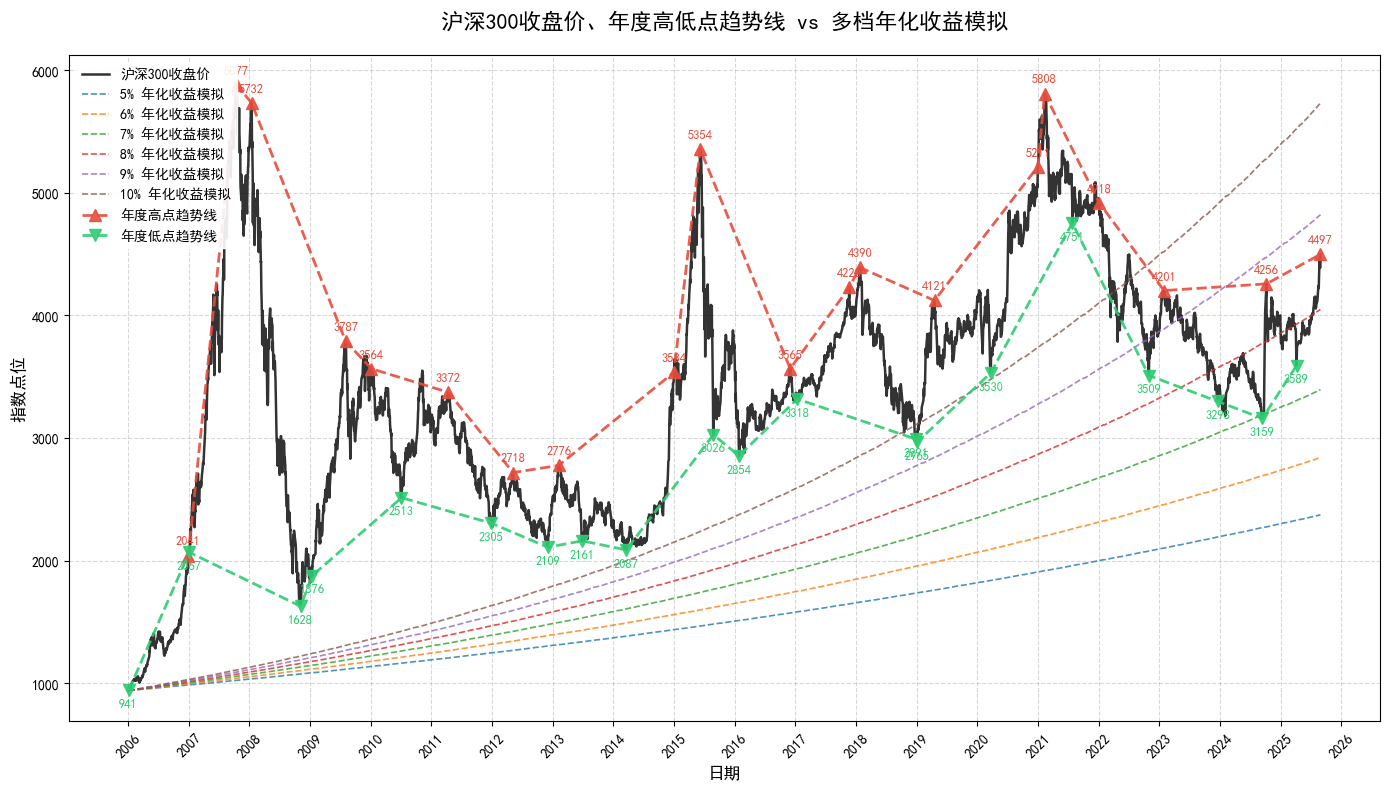

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator

# --------------------------
# 基础设置（中文显示、画布大小）
# --------------------------
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示
fig, ax = plt.subplots(figsize=(14, 8))        # 统一画布（大小可调整）


# --------------------------
# 第一步：准备数据（确保数据格式正确）
# --------------------------
# 假设你的原始数据框为 df，包含以下列：
# - 索引：日期（datetime格式，与原“年化收益图”一致）
# - 收盘：沪深300收盘价（与原“年化收益图”的'收盘'列对应）
# - sim_5pct_annual ~ sim_10pct_annual：多档年化收益模拟列

# 1. 提取日期和收盘价（用于计算年度高低点）
hs300_data = df[['收盘']].copy()
hs300_data.reset_index(inplace=True)  # 将索引（日期）转为列，便于后续处理
hs300_data.columns = ['date', 'close']  # 重命名列，统一格式
hs300_data['date'] = pd.to_datetime(hs300_data['date'])  # 确保日期为datetime格式
hs300_data['year'] = hs300_data['date'].dt.year  # 添加年份列，用于分组找高低点


# --------------------------
# 第二步：计算每年的最高点/最低点及对应日期
# --------------------------
annual_extremes = hs300_data.groupby('year').agg(
    年度高点=('close', 'max'),
    年度低点=('close', 'min'),
    高点日期=('date', lambda x: x[hs300_data.loc[x.index, 'close'].idxmax()]),  # 高点对应日期
    低点日期=('date', lambda x: x[hs300_data.loc[x.index, 'close'].idxmin()])   # 低点对应日期
).reset_index()


# --------------------------
# 第三步：绘制所有元素（按层次叠加，避免遮挡）
# --------------------------
# 1. 先画：多档固定年化收益模拟线（原代码逻辑，虚线，颜色按原定义）
cols_map = {
    '收盘':              ('black', '-',   '沪深300收盘价'),  # 原“收盘”列改为“沪深300收盘价”，更清晰
    'sim_5pct_annual':   ('tab:blue',    '--', '5% 年化收益模拟'),
    'sim_6pct_annual':   ('tab:orange',  '--', '6% 年化收益模拟'),
    'sim_7pct_annual':   ('tab:green',   '--', '7% 年化收益模拟'),
    'sim_8pct_annual':   ('tab:red',     '--', '8% 年化收益模拟'),
    'sim_9pct_annual':   ('tab:purple',  '--', '9% 年化收益模拟'),
    'sim_10pct_annual':  ('tab:brown',   '--', '10% 年化收益模拟'),
}

for col, (color, ls, label) in cols_map.items():
    ax.plot(
        df.index,  # 原数据的日期索引（与年化收益线一致）
        df[col],
        color=color,
        linestyle=ls,
        linewidth=1.8 if col == '收盘' else 1.2,  # 收盘价线加粗，突出主体
        label=label,
        alpha=0.8  # 适当透明度，避免重叠时遮挡
    )

# 2. 再画：年度高点趋势线（红色虚线+三角形标记，叠加在收盘价上）
ax.plot(
    annual_extremes['高点日期'],
    annual_extremes['年度高点'],
    color='#e74c3c',    # 深红色，与年化线颜色区分
    marker='^',         # 三角形标记（表示高点）
    markersize=8,       # 标记大小
    linestyle='--',     # 虚线连接
    linewidth=2,        # 趋势线加粗
    label='年度高点趋势线',
    alpha=0.9
)

# 3. 最后画：年度低点趋势线（绿色虚线+倒三角形标记，避免被高点线遮挡）
ax.plot(
    annual_extremes['低点日期'],
    annual_extremes['年度低点'],
    color='#2ecc71',    # 深绿色，与其他线颜色区分
    marker='v',         # 倒三角形标记（表示低点）
    markersize=8,
    linestyle='--',
    linewidth=2,
    label='年度低点趋势线',
    alpha=0.9
)


# --------------------------
# 第四步：添加高低点数值标注（避免与线重叠）
# --------------------------
for _, row in annual_extremes.iterrows():
    # 高点标注：在三角形上方，红色字体
    ax.annotate(
        f'{row["年度高点"]:.0f}',  # 保留整数，避免标注过长
        xy=(row['高点日期'], row['年度高点']),
        xytext=(0, 8),  # 文字在标记上方8个像素
        textcoords='offset points',
        fontsize=9,
        color='#e74c3c',
        ha='center'  # 文字水平居中
    )
    
    # 低点标注：在倒三角形下方，绿色字体
    ax.annotate(
        f'{row["年度低点"]:.0f}',
        xy=(row['低点日期'], row['年度低点']),
        xytext=(0, -12),  # 文字在标记下方12个像素
        textcoords='offset points',
        fontsize=9,
        color='#2ecc71',
        ha='center'
    )


# --------------------------
# 第五步：美化图表（标题、坐标轴、图例）
# --------------------------
# 1. 标题和坐标轴标签
ax.set_title(
    '沪深300收盘价、年度高低点趋势线 vs 多档年化收益模拟',
    fontsize=16,
    pad=20  # 标题与图表的间距
)
ax.set_xlabel('日期', fontsize=12)
ax.set_ylabel('指数点位', fontsize=12)

# 2. X轴：按年份显示刻度，避免日期重叠
ax.xaxis.set_major_locator(YearLocator())  # 每年一个主刻度
ax.xaxis.set_major_formatter(DateFormatter('%Y'))  # 刻度格式为“年份”
plt.xticks(rotation=45)  # 年份标签旋转45度，避免拥挤

# 3. 网格：浅色虚线，辅助阅读
ax.grid(True, linestyle='--', alpha=0.3, color='gray')

# 4. 图例：统一放在右上角，避免遮挡数据
ax.legend(
    loc='upper left',  # 图例位置（可根据数据分布调整，如'upper right'）
    fontsize=10,
    framealpha=0.9,    # 图例背景透明度
    edgecolor='white'  # 图例边框颜色
)

# 5. 调整布局，避免元素被截断
plt.tight_layout()


# --------------------------
# 显示/保存图表
# --------------------------
plt.show()
# 若需保存，可添加：
# plt.savefig('沪深300_合并图表.png', dpi=300, bbox_inches='tight')

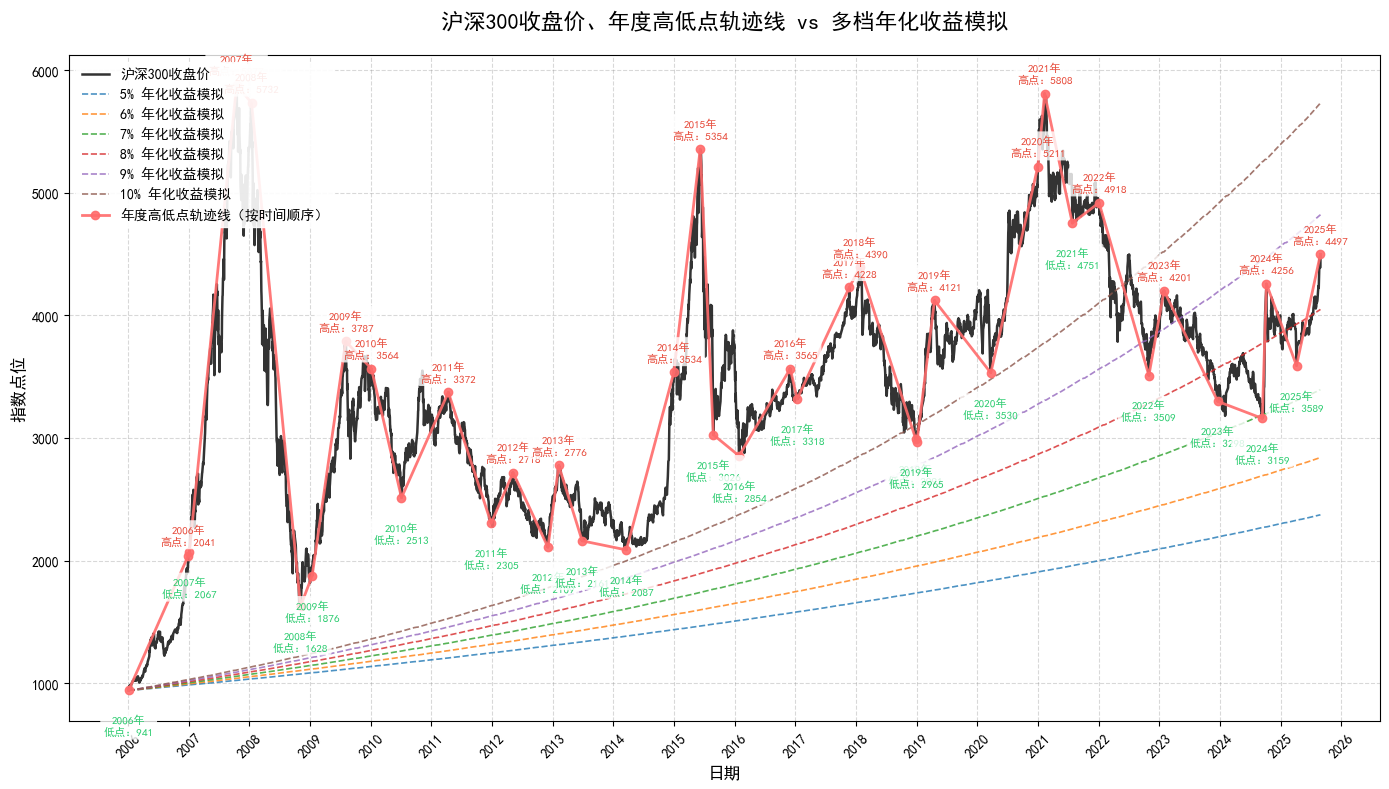

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator

# --------------------------
# 基础设置（中文显示、统一画布）
# --------------------------
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(14, 8))  # 画布大小可按需调整


# --------------------------
# 第一步：数据准备（确保日期格式与原数据一致）
# --------------------------
# 假设原始数据框为 df，索引是日期（datetime格式），包含“收盘”和各年化模拟列
# 1. 提取收盘价和日期，用于计算年度高低点
hs300_data = df[['收盘']].copy()
hs300_data.reset_index(inplace=True)  # 日期索引转成列，便于处理
hs300_data.columns = ['date', 'close']  # 重命名列：date=日期，close=收盘价
hs300_data['date'] = pd.to_datetime(hs300_data['date'])  # 确保日期格式正确
hs300_data['year'] = hs300_data['date'].dt.year  # 新增年份列，用于按年分组


# --------------------------
# 第二步：提取每年的高低点（含具体日期），并按时间排序
# --------------------------
# 1. 按年份分组，提取每年的“高点+日期”和“低点+日期”
annual_highs = hs300_data.groupby('year').agg({
    'date': lambda x: x[hs300_data.loc[x.index, 'close'].idxmax()],  # 高点日期
    'close': 'max'  # 高点价格
}).rename(columns={'close': 'price'})  # 统一列名为price，便于后续合并
annual_highs['type'] = 'high'  # 标记“高点”类型

annual_lows = hs300_data.groupby('year').agg({
    'date': lambda x: x[hs300_data.loc[x.index, 'close'].idxmin()],  # 低点日期
    'close': 'min'  # 低点价格
}).rename(columns={'close': 'price'})  # 统一列名为price
annual_lows['type'] = 'low'  # 标记“低点”类型

# 2. 合并每年的高低点，按“实际日期”排序（核心：按时间先后顺序）
annual_extremes = pd.concat([annual_highs, annual_lows]).sort_values('date')
# 重置索引，避免分组残留的year索引干扰
annual_extremes.reset_index(inplace=True)


# --------------------------
# 第三步：绘制所有元素（按层次叠加，确保清晰）
# --------------------------
# 1. 先画：多档固定年化收益模拟线（保留原代码逻辑）
cols_map = {
    '收盘':              ('black', '-',   '沪深300收盘价'),  # 主体线加粗
    'sim_5pct_annual':   ('tab:blue',    '--', '5% 年化收益模拟'),
    'sim_6pct_annual':   ('tab:orange',  '--', '6% 年化收益模拟'),
    'sim_7pct_annual':   ('tab:green',   '--', '7% 年化收益模拟'),
    'sim_8pct_annual':   ('tab:red',     '--', '8% 年化收益模拟'),
    'sim_9pct_annual':   ('tab:purple',  '--', '9% 年化收益模拟'),
    'sim_10pct_annual':  ('tab:brown',   '--', '10% 年化收益模拟'),
}

for col, (color, ls, label) in cols_map.items():
    ax.plot(
        df.index,  # 原数据的日期索引（与年化线一致）
        df[col],
        color=color,
        linestyle=ls,
        linewidth=1.8 if col == '收盘' else 1.2,  # 收盘价线加粗，突出主体
        label=label,
        alpha=0.8  # 适当透明度，避免遮挡后续高低点线
    )

# 2. 再画：按时间顺序连接的年度高低点轨迹线（核心修改部分）
ax.plot(
    annual_extremes['date'],  # 高低点的实际发生日期（按时间排序）
    annual_extremes['price'],  # 高低点价格
    color='#ff6b6b',  # 醒目红色，与其他线区分
    marker='o',       # 圆形标记，清晰显示每个高低点
    markersize=6,     # 标记大小
    linestyle='-',    # 实线连接（体现时间先后顺序）
    linewidth=2,      # 轨迹线加粗，突出重点
    label='年度高低点轨迹线（按时间顺序）',
    alpha=0.9
)


# --------------------------
# 第四步：添加高低点标注（区分高点/低点，避免重叠）
# --------------------------
for _, row in annual_extremes.iterrows():
    # 标注内容：年份+高低点类型+价格（如“2006年 低点：1234”）
    label_text = f"{row['year']}年\n{('高点' if row['type'] == 'high' else '低点')}：{row['price']:.0f}"
    
    # 位置调整：高点标注在标记上方，低点标注在标记下方，避免遮挡
    if row['type'] == 'high':
        y_offset = 15  # 高点标注向上偏移15个像素
        color = '#e74c3c'  # 高点用深红色
    else:
        y_offset = -25  # 低点标注向下偏移25个像素（避免与线重叠）
        color = '#2ecc71'  # 低点用深绿色
    
    ax.annotate(
        label_text,
        xy=(row['date'], row['price']),
        xytext=(0, y_offset),  # 垂直方向偏移
        textcoords='offset points',
        fontsize=8,
        color=color,
        ha='center',  # 水平居中
        va='center',  # 垂直居中
        bbox=dict(  # 加白色背景框，避免被线遮挡
            boxstyle='round,pad=0.3',
            facecolor='white',
            alpha=0.8,
            edgecolor='none'
        )
    )


# --------------------------
# 第五步：图表美化（优化坐标轴、图例）
# --------------------------
# 1. 标题和坐标轴标签
ax.set_title(
    '沪深300收盘价、年度高低点轨迹线 vs 多档年化收益模拟',
    fontsize=16,
    pad=20
)
ax.set_xlabel('日期', fontsize=12)
ax.set_ylabel('指数点位', fontsize=12)

# 2. X轴：按年份显示刻度，解决日期密集问题
ax.xaxis.set_major_locator(YearLocator())  # 每年1个主刻度
ax.xaxis.set_major_formatter(DateFormatter('%Y'))  # 刻度格式为“年份”
plt.xticks(rotation=45)  # 年份标签旋转45度，避免拥挤

# 3. 网格：浅色虚线，辅助阅读
ax.grid(True, linestyle='--', alpha=0.3, color='gray')

# 4. 图例：放在左上角，避免遮挡数据（可按需调整位置）
ax.legend(
    loc='upper left',
    fontsize=10,
    framealpha=0.9,  # 图例背景半透明
    edgecolor='white'
)

# 5. 调整布局，避免元素被截断
plt.tight_layout()


# --------------------------
# 显示/保存图表
# --------------------------
plt.show()
# 如需保存高清图，可添加：
# plt.savefig('沪深300_高低点时间轨迹图.png', dpi=300, bbox_inches='tight')

=== 相邻高低点涨跌幅基础统计 ===
总样本数：39
平均涨跌幅：12.34%
中位数涨跌幅：1.28%
最大涨幅：184.32%（2007.0-2007）
最大跌幅：-71.60%（2008.0-2008）
平均持续时间：184.0 天

=== 按类型组合统计 ===
          return_pct               days_between
                mean  median count         mean
type_pair                                      
high→high     0.1169  0.0384     5     101.6000
high→low     -0.2548 -0.2228    14     204.2857
low→high      0.5188  0.3420    15     202.8667
low→low       0.0022 -0.0341     5     153.2000


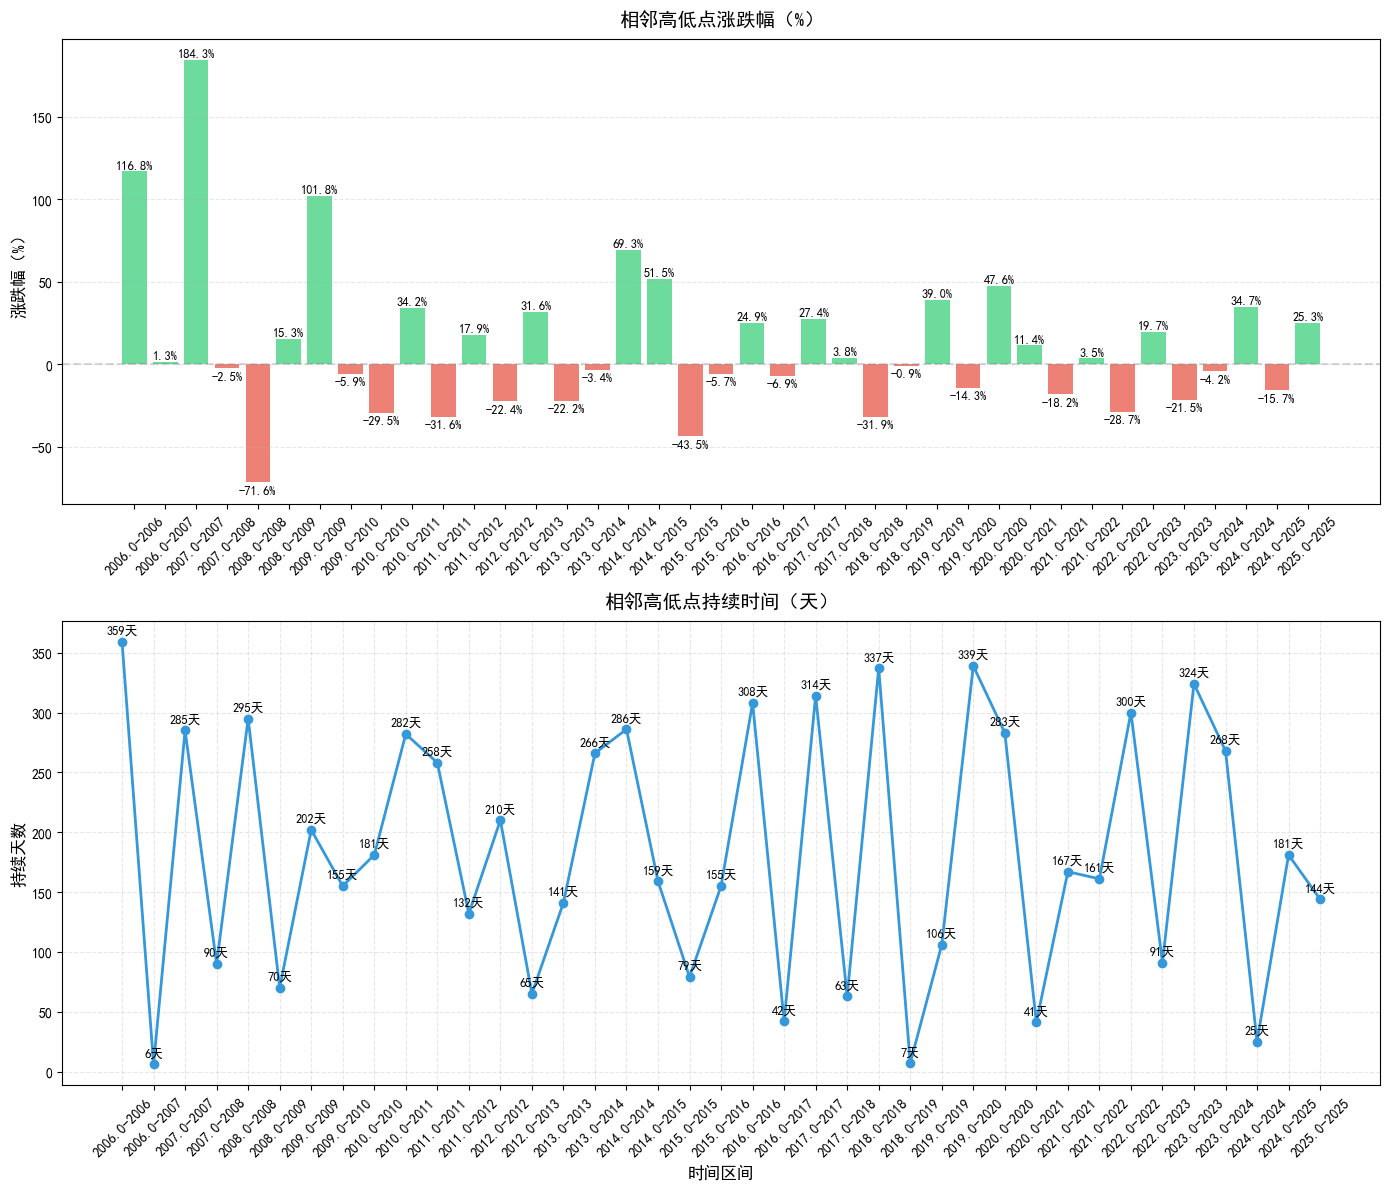

高点到低点的平均跌幅： -0.25477097962235323


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def analyze_extremes_returns(annual_extremes):
    """
    分析年度高低点相邻点之间的涨跌幅和持续时间
    
    参数：
    annual_extremes - 按时间排序的年度高低点数据框，需包含'date'（日期）、'price'（价格）、'type'（类型）、'year'（年份）列
    
    返回：
    returns_df - 包含相邻点涨跌幅分析的结果数据框
    """
    # 1. 计算相邻点之间的涨跌幅和持续时间
    returns_df = pd.DataFrame()
    
    # 相邻点价格变动（后一个点 - 前一个点）
    returns_df['price_change'] = annual_extremes['price'].diff()
    
    # 相邻点涨跌幅（(后一个点价格 / 前一个点价格) - 1）
    returns_df['return_pct'] = (annual_extremes['price'] / annual_extremes['price'].shift(1)) - 1
    
    # 相邻点持续时间（天数）
    returns_df['days_between'] = (annual_extremes['date'] - annual_extremes['date'].shift(1)).dt.days
    
    # 相邻点的类型组合（如"low→high"、"high→low"）
    returns_df['type_pair'] = annual_extremes['type'].shift(1) + '→' + annual_extremes['type']
    
    # 相邻点的日期范围
    returns_df['start_date'] = annual_extremes['date'].shift(1)
    returns_df['end_date'] = annual_extremes['date']
    
    # 相邻点的年份范围
    returns_df['period'] = annual_extremes['year'].shift(1).astype(str) + '-' + annual_extremes['year'].astype(str)
    
    # 移除第一行（无前置数据）
    returns_df = returns_df.dropna().reset_index(drop=True)
    
    # 2. 基础统计分析
    print("=== 相邻高低点涨跌幅基础统计 ===")
    print(f"总样本数：{len(returns_df)}")
    print(f"平均涨跌幅：{returns_df['return_pct'].mean():.2%}")
    print(f"中位数涨跌幅：{returns_df['return_pct'].median():.2%}")
    print(f"最大涨幅：{returns_df['return_pct'].max():.2%}（{returns_df.loc[returns_df['return_pct'].idxmax(), 'period']}）")
    print(f"最大跌幅：{returns_df['return_pct'].min():.2%}（{returns_df.loc[returns_df['return_pct'].idxmin(), 'period']}）")
    print(f"平均持续时间：{returns_df['days_between'].mean():.1f} 天")
    print("\n=== 按类型组合统计 ===")
    print(returns_df.groupby('type_pair').agg({
        'return_pct': ['mean','median', 'count'],
        'days_between': 'mean'
    }).round(4))
    
    # 3. 可视化分析
    fig, axes = plt.subplots(2, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [1, 1]})
    
    # 子图1：涨跌幅柱状图（区分涨跌）
    colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in returns_df['return_pct']]
    axes[0].bar(
        returns_df['period'], 
        returns_df['return_pct'] * 100,  # 转换为百分比
        color=colors, 
        alpha=0.7
    )
    axes[0].axhline(y=0, color='gray', linestyle='--', alpha=0.3)
    axes[0].set_title('相邻高低点涨跌幅（%）', fontsize=14, pad=10)
    axes[0].set_ylabel('涨跌幅（%）', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', linestyle='--', alpha=0.3)
    
    # 在柱状图上标注涨跌幅
    for i, val in enumerate(returns_df['return_pct']):
        axes[0].text(
            i, val * 100 + (0.5 if val > 0 else -1.5),
            f'{val:.1%}',
            ha='center', va='bottom' if val > 0 else 'top',
            fontsize=9
        )
    
    # 子图2：持续时间折线图
    axes[1].plot(
        returns_df['period'],
        returns_df['days_between'],
        color='#3498db',
        marker='o',
        linewidth=2,
        markersize=6
    )
    axes[1].set_title('相邻高低点持续时间（天）', fontsize=14, pad=10)
    axes[1].set_ylabel('持续天数', fontsize=12)
    axes[1].set_xlabel('时间区间', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(linestyle='--', alpha=0.3)
    
    # 在折线图上标注天数
    for i, val in enumerate(returns_df['days_between']):
        axes[1].text(
            i, val + 5,
            f'{val:.0f}天',
            ha='center', va='bottom',
            fontsize=9
        )
    
    plt.tight_layout()
    plt.show()
    
    return returns_df

# 使用示例（假设已生成annual_extremes数据框）：
returns_analysis = analyze_extremes_returns(annual_extremes)
# 可进一步筛选特定类型组合的区间，例如：
high_to_low = returns_analysis[returns_analysis['type_pair'] == 'high→low']
print("高点到低点的平均跌幅：", high_to_low['return_pct'].mean())
    

In [80]:
annual_extremes

,year,date,price,type
0,2006,2006-01-04,941.43,low
1,2006,2006-12-29,2041.05,high
2,2007,2007-01-04,2067.09,low
3,2007,2007-10-16,5877.20,high
4,2008,2008-01-14,5731.76,high
5,2008,2008-11-04,1627.76,low
6,2009,2009-01-13,1876.19,low
7,2009,2009-08-03,3787.03,high
8,2010,2010-01-05,3564.04,high
9,2010,2010-07-05,2512.65,low
